# Hypothesis testing: 2-Sample t-test (2stt)

check https://www.statology.org/two-sample-t-test/

Calculate a Two-sample t-test twice. 
1. approach manually: see the maths and reasoning behind it (help with comprehension and help you to design better experiments.)
2. shorter coding way : where a computer will do all the work for you, but won't tell you why, it's a black box of numbers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# I. The manual approach

## 1.&nbsp; Describe the problem
Define the initial question for which the truth is not known.

You have created an an experiment with two versions of a webpage. The metric you compare is the session time each user stays on the page. 

If your confidence level is 90%, is there a statistically significant difference between the two pages?

In [5]:
# session_times.csv
url = 'https://drive.google.com/file/d/1nYRMCgv3OKaiIUDBPgq-EnE2sWhgrJI3/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
se_times = pd.read_csv(path)

se_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


In [12]:
se_times.shape

(36, 2)

In [17]:
se_times

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0
5,Page B,85.0
6,Page A,211.0
7,Page B,246.0
8,Page A,132.0
9,Page B,149.0


In [13]:
pa_s = se_times.loc[se_times.Page == "Page A"].reset_index().Time

In [18]:
pa_s.shape

(21,)

In [20]:
pa_s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21 entries, 0 to 20
Series name: Time
Non-Null Count  Dtype  
--------------  -----  
21 non-null     float64
dtypes: float64(1)
memory usage: 296.0 bytes


In [14]:
pb_s = se_times.loc[se_times.Page == "Page B"].reset_index().Time

In [19]:
pb_s.shape

(15,)

In [21]:
pa_s.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21 entries, 0 to 20
Series name: Time
Non-Null Count  Dtype  
--------------  -----  
21 non-null     float64
dtypes: float64(1)
memory usage: 296.0 bytes


## 2.&nbsp; State the Null Hypothesis(H0) and the Alternative Hypothesis(H1)

- H0 : pa_s and pb_s means are not different (pa_mean-pb_mean = 0)
- H1 : pa_s and pb_s means are  different (pa_mean-pb_mean != 0)

In [23]:
pa_mean = pa_s.mean()
pa_mean

126.33333333333333

In [25]:
pb_mean = pb_s.mean()
pb_mean

162.0

## 3.&nbsp; Select an appropriate significance level alpha ($\alpha$).

alpha can vary from 0.1 ,0.05 up to 0.01 (signficance level)
Depend on how much certin you want your test result to be 
Certinity inc --> aplha decrease

In [26]:
alpha = 0.1

## 4.&nbsp; Consider the statistical assumptions about the set of data.

1. The observations in one sample should be independent of the observations in the other sample.
2. The data should be approximately normally distributed.
3. The two samples should have approximately the same variance. (If this assumption is not met, you should instead perform a Welch’s t-test.)
4. The data in both samples was obtained using a random sampling method.

#### a.&nbsp; The observations in one sample should be independent of the observations in the other sample.
#### b.&nbsp; The data in both samples was obtained using a random sampling method.

This needs to be ensured while collecting the data. At this point, we will assume that the Data were selected randomly, and that thus, their values are independent.

#### c.&nbsp; The data should be approximately normally distributed.

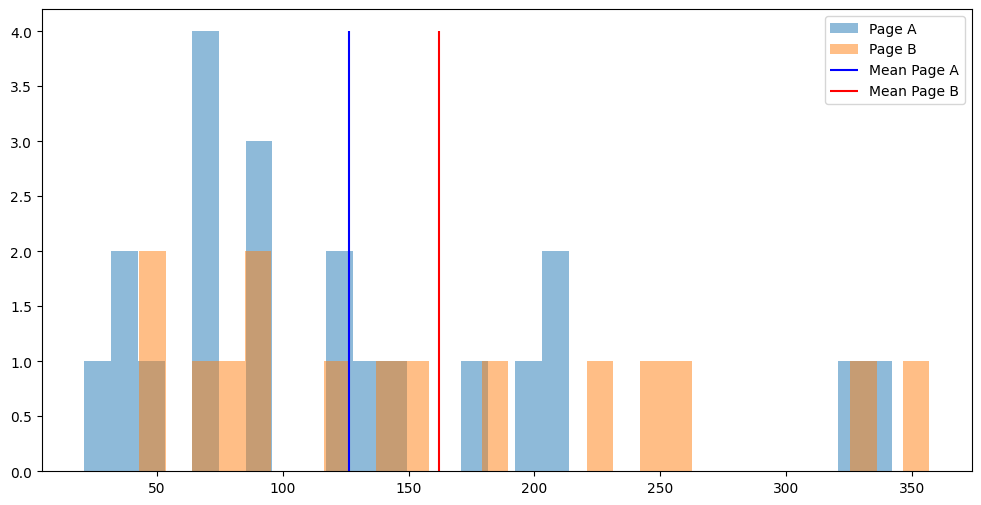

In [29]:
plt.figure(figsize=(12,6))
# Plot a histogram of the plants' heights.
ya, xa, _ = plt.hist(pa_s, bins=30, alpha=0.5, label="Page A")
yb, xb, _ = plt.hist(pb_s, bins=30, alpha=0.5, label="Page B")
# Add a vertical line for the mean of field A.
plt.vlines(pa_mean, ymin=0, ymax=max(max(ya), max(yb)), color="blue", label="Mean Page A")
# Add a vertical line for the mean of field B.
plt.vlines(pb_mean, ymin=0, ymax=max(max(ya), max(yb)), color="red", label="Mean Page B")
plt.legend()
plt.show()

#### d.&nbsp; The two samples should have approximately the same variance.

In practice, the variances of the two samples are not equal.
For this reason, Welch's test should always be chosen over a 2-sample t-test: it takes the differences between the variances into account, and returns the same result as the 2-sample t-test whenever variances are equal.

In [30]:
var_a = np.var(pa_s)
var_a

7453.079365079366

In [31]:
var_b = np.var(pb_s)
var_b

9546.666666666666

## 5.&nbsp; Decide on the appropriate test to use and the associated test statistic.



![image.png](assistant_hypothesis.gif)

In this case 2stt or wechle test

## 6.&nbsp; Derive the distribution of the test statistic.
The t-score follows a **student's t-distribution with n-1 degrees of freedom**.
- Ideally t distributions are tends to be = to normal distribution as n (sample size) gets bigger
- n --> smaple size Accepted value starts from 30
- ddof --> delta degree of freedom are the number of values that we need to be able to fully control our test statistic (ie smean), in this case we can allow all n value to vary , and we can control only 1 datapoint to be able bring our smean to any valu we want , hence ddof=1
- dof --> degree of freedom = n-ddof

The conservative approach is to take as n the smaller of the sample sizes.

In [33]:
n_a = len(pa_s)
n_b = len(pb_s)
n = min(n_a, n_b)
ddof = 1
dof = n - 1
dof

14

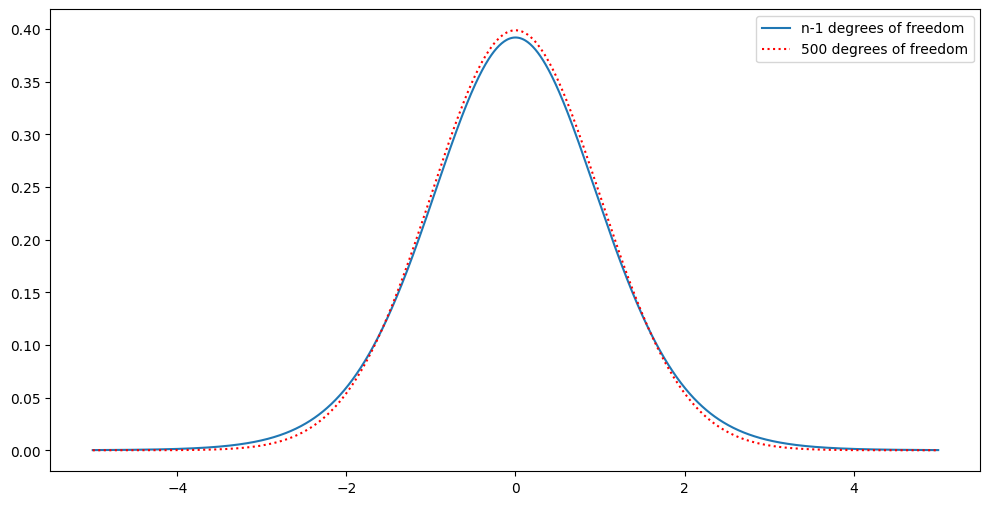

In [34]:
plt.figure(figsize=(12,6))
# Create a linear space from -5 to 5 with 1000 intervals for our x-axis.
xt = np.linspace(-5,5,1000)
yf = stats.t.pdf(xt,dof)
# Plot t-distributions with different degrees of freedom.
plt.plot(xt, yf, label="n-1 degrees of freedom")
plt.plot(xt, stats.t.pdf(xt,500), color="red", linestyle="dotted" ,label="500 degrees of freedom")
plt.legend()
plt.show()

## 7.&nbsp; Compute the test statistic using the data set.
for 2stt --> 
$t = \frac{\bar{x_1} – \bar{x_2}} {\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}$

In [35]:
s_a = pa_s.std(ddof=ddof)
s_b = pb_s.std(ddof=ddof)
s_a,s_b

(88.46317501273246, 101.13640011673063)

In [36]:
tscore = (pa_mean - pb_mean) / np.sqrt((s_a**2 / n_a) + (s_b**2) / n_b)
tscore

-1.098315562363811

## 8.&nbsp; Derive the critical region associated with the level of alpha.
Not too long ago, people used large tables like [this](https://www.statology.org/here-is-how-to-find-the-p-value-from-the-t-distribution-table/) to look up the critical values associated with a certain level of alpha.
- if you perform a two-sided test, you need two critical values.Since t-distribution is symmetrical, the same is true for the critical values.The second critical value is thus -ve of the one from the table
- if you want the lower tail --> set the Critical values from table to -ve

In [37]:
#alpha = 0.1 , twotail, df=14   --> critical value = 1.761
crit_val = 1.761

## 9.&nbsp; Compare the test statistic with the critical values.

The test statistic is in the critical region because it is more extreme as the critical value.
For this reason, the null Hypothesis will be rejected.

In [51]:
if crit_val > tscore:
  print("The critical value is larger than t-score. H0 --> Fail to reject")
  if(pa_mean > pb_mean):
    print(f"Most likely PageA time session are higher with average of {round(pa_mean - pb_mean,2)}")
  else:
    print(f"Most likely PageB time session are higher with average of {round(pb_mean - pa_mean,2)}")
else:
  print("The critical value is smaller than t-score. H0 --> rejected")

The critical value is larger than t-score. H0 --> Fail to reject
Most likely PageB time session are higher with average of 35.67


# II. The coders approach

In [46]:
t_score, p_value = stats.ttest_ind(a = pa_s, b = pb_s, alternative='two-sided')

In [48]:
if p_value > alpha:
  print("The p-value is larger than alpha. H0 --> Fail to reject")
  if(pa_mean > pb_mean):
    print(f"Most likely PageA time session are higher with average of {round(pa_mean - pb_mean,2)}")
  else:
    print(f"Most likely PageB time session are higher with average of {round(pb_mean - pa_mean,2)}")
else:
  print("The p-value is smaller than alpha. H0 --> rejected")

The p-value is larger than alpha. H0 --> Fail to reject
Most likely PageB time session are higher with average of 35.67


# III. Visualization

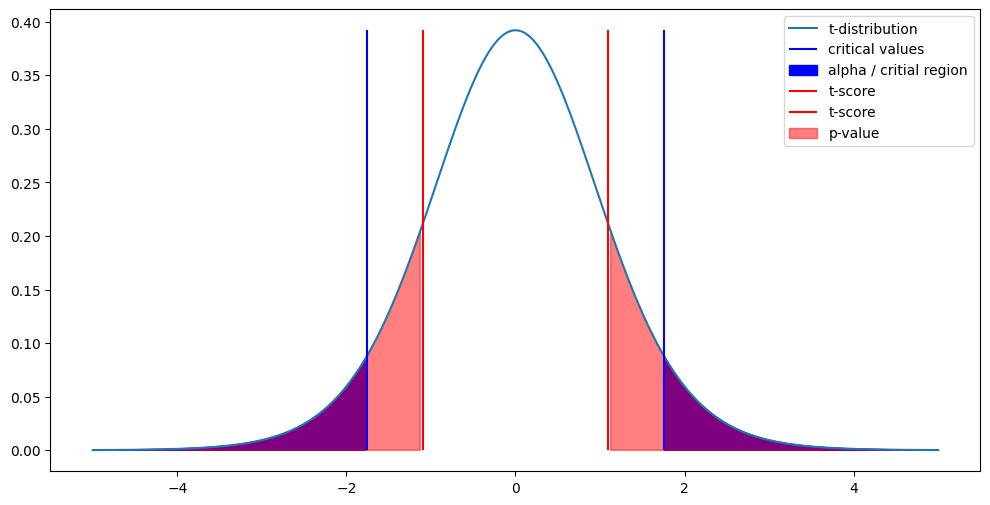

In [50]:
plt.figure(figsize=(12,6))
# Create a linear space from -5 to 5 with 1000 intervals for our x-axis.
xt = np.linspace(-5,5,1000)
yf = stats.t.pdf(xt,dof)
# Plot t-distributions with different degrees of freedom.
plt.plot(xt, yf, label="t-distribution")

# Shade the area under the curve for values more extreme than +/-crit_val (= alpha).
plt.vlines(-crit_val, ymin=0, ymax=max(yf), color="blue", label="critical values")
plt.vlines(crit_val, ymin=0, ymax=max(yf), color="blue")
plt.fill_between(xt, yf, where=(-crit_val>xt)|(xt>crit_val), color= "b", label="alpha / critial region")

# Shade the region in the tails that is more extreme than the +/-t-score (= p-value).
plt.vlines(tscore, ymin=0, ymax=max(yf), color="red", label="t-score")
plt.vlines(-tscore, ymin=0, ymax=max(yf), color="red", label="t-score")
plt.fill_between(xt, yf, where=(-abs(t_score)>xt)|(xt>abs(t_score)), color= "r", alpha=0.5, label="p-value")


plt.legend()
plt.show()